In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [16]:
full = cv2.imread('sunflowertr.jpg')
# the image is uploaded

In [17]:
full=cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

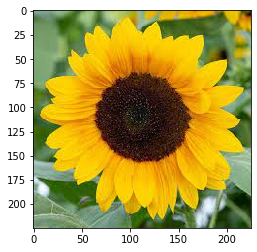

In [18]:
plt.imshow(full)

In [25]:
full2 =cv2.resize(full,(600,600))
#i did reshaped the image to make it adaptable

In [26]:
test= cv2.imread('sunflower.jpg')

In [27]:
test= cv2.cvtColor(test, cv2.COLOR_BGR2RGB)

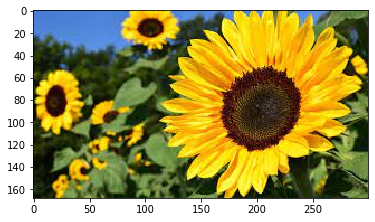

In [28]:
plt.imshow(test)

In [30]:
print('test image shape:', full2.shape)
print('training image shape:', test.shape)


test image shape: (600, 600, 3)
training image shape: (168, 300, 3)


In [31]:
methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

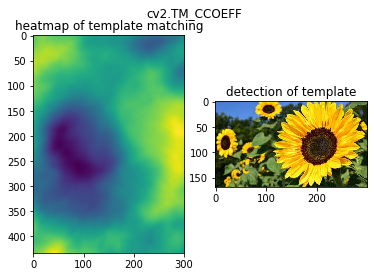

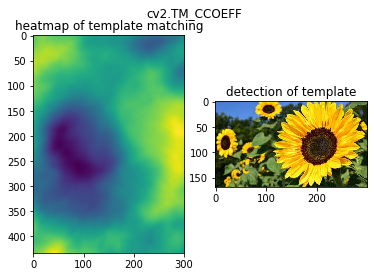

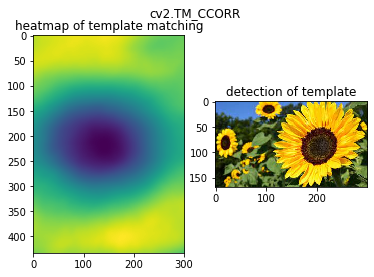

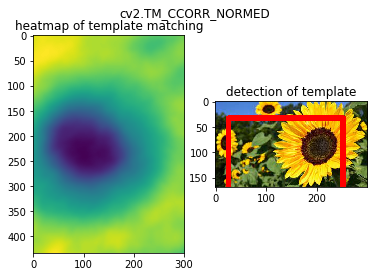

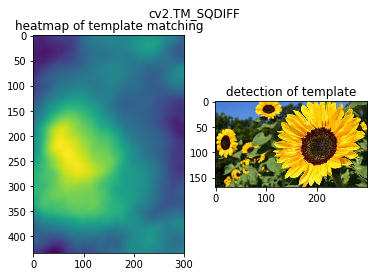

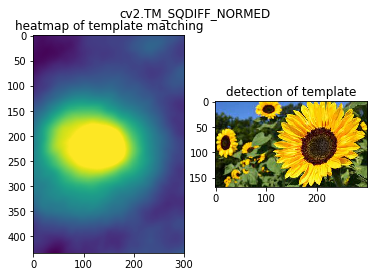

In [37]:
for m in methods:
    test_copy= test.copy()
    method= eval(m)
    
    res=cv2.matchTemplate(test_copy, full2, method)
    
    min_val, max_val, min_loc,max_loc= cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left= min_loc
    else:
        top_left= max_loc
        
    height, width, channels= full.shape
    bottom_right= (top_left[0]+ width, top_left[1]+ height)
    
    cv2.rectangle(test_copy, top_left, bottom_right, (255,0,0),10)
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title("heatmap of template matching")
    plt.subplot(122)
    plt.imshow(test_copy)
    plt.title('detection of template')
    
    plt.suptitle(m)
    
    plt.show()
    print('\n')
    print('\n')
# many different aspects are analyzed like the scale of colors, and the heat many of the different scales